<a href="https://colab.research.google.com/github/arianajschindler/greenland_climate_variation/blob/main/Schindler_final_climate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Answering the research question: Was there a significant change in temperature in Greenland from 1991-2020? 

We collected data for our 30-year time period from climateknowledgeportal.worldbank.org.

The first thing we need to do is import our raw data.

# Importing and Cleaning

In [ ]:
# mounting the google drive and importing the data
from google.colab import drive
drive.mount('/gdrive')
import pandas as pd
climate = pd.read_csv('/gdrive/MyDrive/DATA0200/greenland_raw_data.csv')
climate.head()

Mounted at /gdrive


,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-26.0,1991,Jan Average,Greenland,GRL
1,-26.6,1991,Feb Average,Greenland,GRL
2,-27.1,1991,Mar Average,Greenland,GRL
3,-23.0,1991,Apr Average,Greenland,GRL
4,-13.0,1991,May Average,Greenland,GRL


This data is already very clean but we want to rename the variables to make them quicker to work with and also add a new variable that displays the temperature in fahrenheit and drop a few variables that were constant through every observation i.e. 'Country'.

In [ ]:
# most of the column names had weird spacing so here i renamed the columns and dropped the old names
climate["celsius_average"] = climate["Temperature - (Celsius)"]
climate.drop(columns = ["Temperature - (Celsius)"], inplace=True)
climate["month_stat"] = climate[" Statistics"]
climate.drop(columns = [" Statistics"], inplace=True)
climate["year"] = climate[" Year"]
climate.drop(columns = [" Year"], inplace=True)

# dropping the variables " Country" and "ISO3" becaue we are looking at one location
climate.drop(columns = [" Country"], inplace=True)
climate.drop(columns = [" ISO3"], inplace=True)

In [ ]:
# adding a temp in fahrenheit column 
climate["fahr_average"] = (climate["celsius_average"] * 9/5) + 32

In [ ]:
# dropping the "Average" from the month variable
climate[["month", "average"]] = climate['month_stat'].str.split(n=3, expand = True)
climate.drop(columns = ['month_stat'], inplace = True)
climate.drop(columns = ['average'], inplace = True)

In [ ]:
# creating a datetime variable to our dataframe
climate['date'] = climate['month'] + "-" + climate['year'].astype(str)
climate['date'] = pd.to_datetime(climate['date'])

In [ ]:
# checking the data for missing elements
climate.isnull().sum()

celsius_average    0
year               0
fahr_average       0
month              0
date               0
dtype: int64

In [ ]:
# checking out the cleaned-up data and make sure there is nothing else we want to adjust in the main dataframe.
climate.head()

,celsius_average,year,fahr_average,month,date
0,-26.0,1991,-14.80,Jan,1991-01-01
1,-26.6,1991,-15.88,Feb,1991-02-01
2,-27.1,1991,-16.78,Mar,1991-03-01
3,-23.0,1991,-9.40,Apr,1991-04-01
4,-13.0,1991,8.60,May,1991-05-01


# EDA

In this section we are getting to know our data so we can begin to think about testing and modeling our question and also to check out which variables we might need to consider that will help in answering it.

In [ ]:
# importing packages we may use
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sms
import matplotlib as mpl
from dateutil.parser import parse 

In [ ]:
# checking descriptive statistics of the quantitative variables in our dataset
# we are mostly interested in the fahr_avrage variable and we also hadn't identified 'year' as a categorical variable yet at this point.
climate.describe()

,celsius_average,year,fahr_average
count,360.000000,360.000000,360.000000
mean,-17.180000,2005.500000,1.076000
std,8.794439,8.667488,15.829991
min,-30.400000,1991.000000,-22.720000
25%,-24.700000,1998.000000,-12.460000
50%,-19.800000,2005.500000,-3.640000
75%,-10.125000,2013.000000,13.775000
max,-1.500000,2020.000000,29.300000


In [ ]:
# we checked for null values but now we want to make sure all of the months are accounted for for all 30 years of our timeframe
# checking how many observations in the 'month' categotical variable
climate.month.value_counts()

Dec    30
Oct    30
Sep    30
Feb    30
Jan    30
Jul    30
Aug    30
Mar    30
Nov    30
May    30
Jun    30
Apr    30
Name: month, dtype: int64

In the descriptive statistics for the dataset we are mostly interested in the temperature variables. In our case, we will be focusing on the fahrenheit variable since we are most familiar with working in fahrenheit.

Text(0.5, 1.0, 'Average Temperature for all 360 Observations')

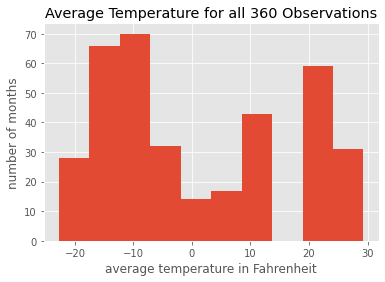

In [ ]:
# histogram visualization of all 360 elemnts in the fahr_average variable
plt.style.use('ggplot')
climate.hist('fahr_average')
plt.xlabel('average temperature in Fahrenheit')
plt.ylabel('number of months')
plt.title('Average Temperature for all 360 Observations')

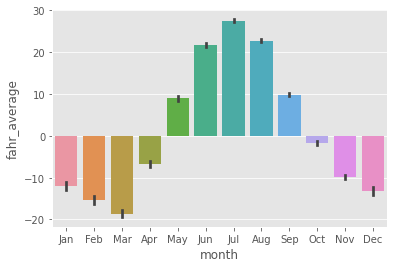

In [ ]:
# seaborn bar plot to show the average of each month over the 30-year timeframe
sns.barplot(data=climate, x='month', y='fahr_average')

Text(0.5, 0.98, 'Range of each month throughout 30-year Timeline')

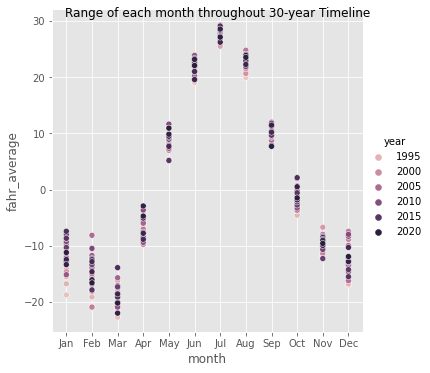

In [ ]:
# scatter plot to show the range of each month throughout the 30 year timeframe
#climate.plot.scatter('month', 'fahr_average')
g = sns.relplot(data=climate, x='month', y='fahr_average', hue='year')
g.fig.suptitle("Range of each month throughout 30-year Timeline")

In [ ]:
# saving dataframe as a csv
climate.to_csv('/gdrive/MyDrive/DATA0200/climate_time')

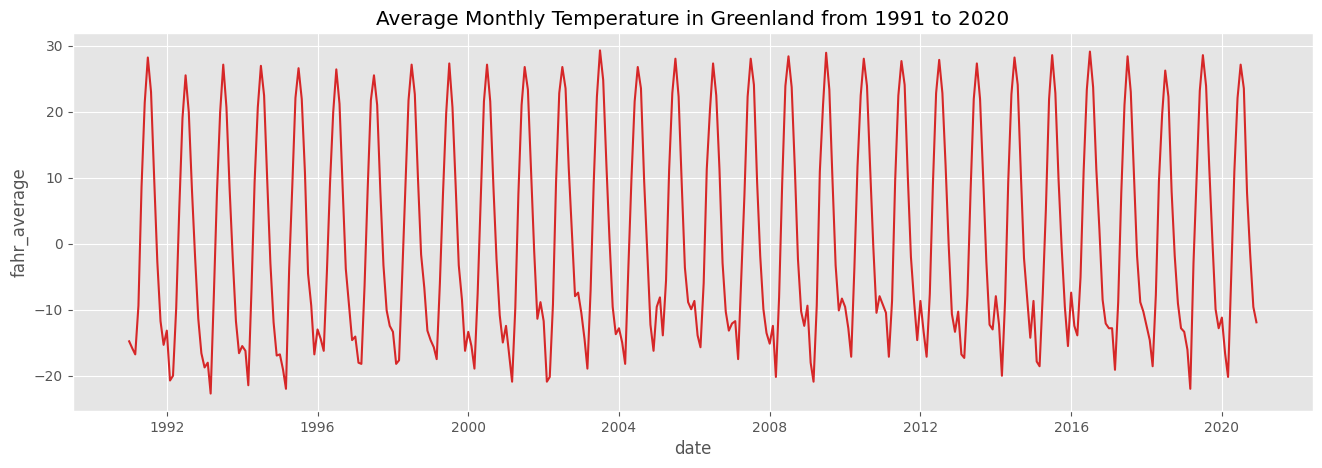

In [ ]:
# visualization of time series
def plot_climate(climate, x, y, title="", xlabel='date', ylabel='fahr_average', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_climate(climate, x=climate.date, y=climate.fahr_average, title='Average Monthly Temperature in Greenland from 1991 to 2020') 

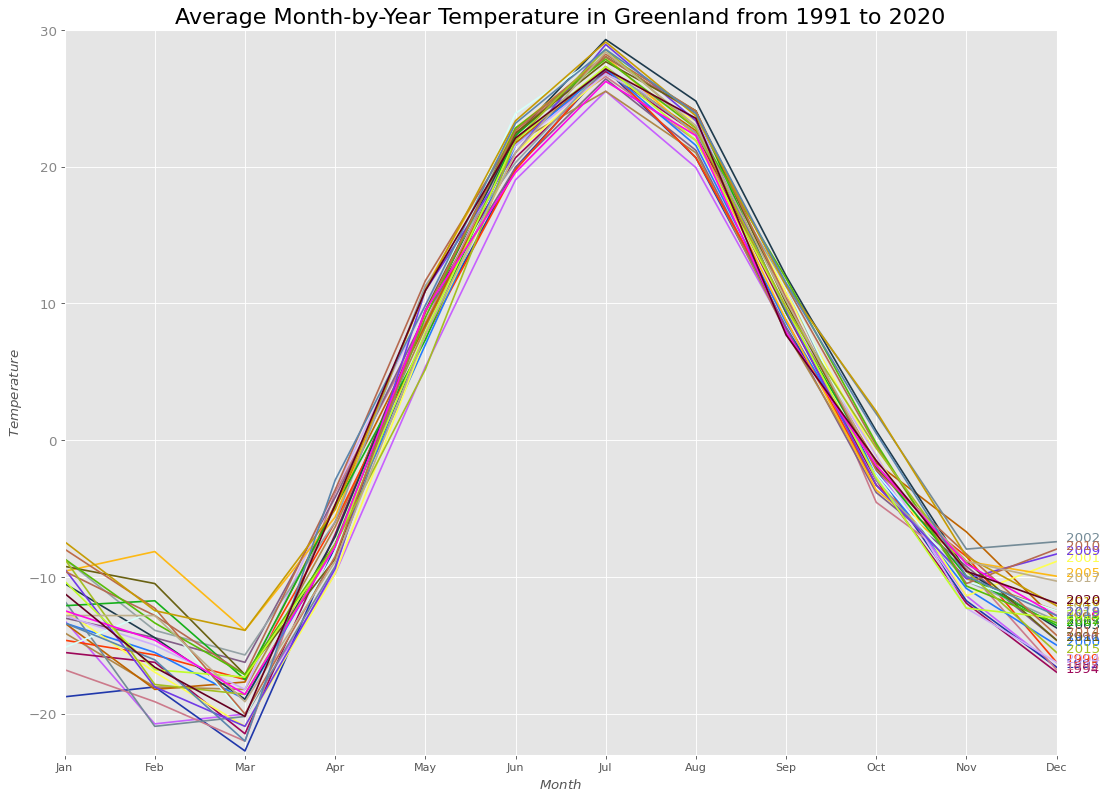

In [ ]:
# Visualization of the average monthly temperature in Greenland from 1991-2020 with all 30 years on the same figure
df = pd.read_csv('/gdrive/MyDrive/DATA0200/climate_time', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

#prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# prep colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# draw plot
plt.figure(figsize=(16,12), dpi=80)
for i, y in enumerate(years): 
  if i>0: 
    plt.plot('month', 'fahr_average', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'fahr_average'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# decor
plt.gca().set(xlim=(0, 11), ylim=(-23, 30), ylabel='$Temperature$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Average Month-by-Year Temperature in Greenland from 1991 to 2020", fontsize=20)
plt.show()

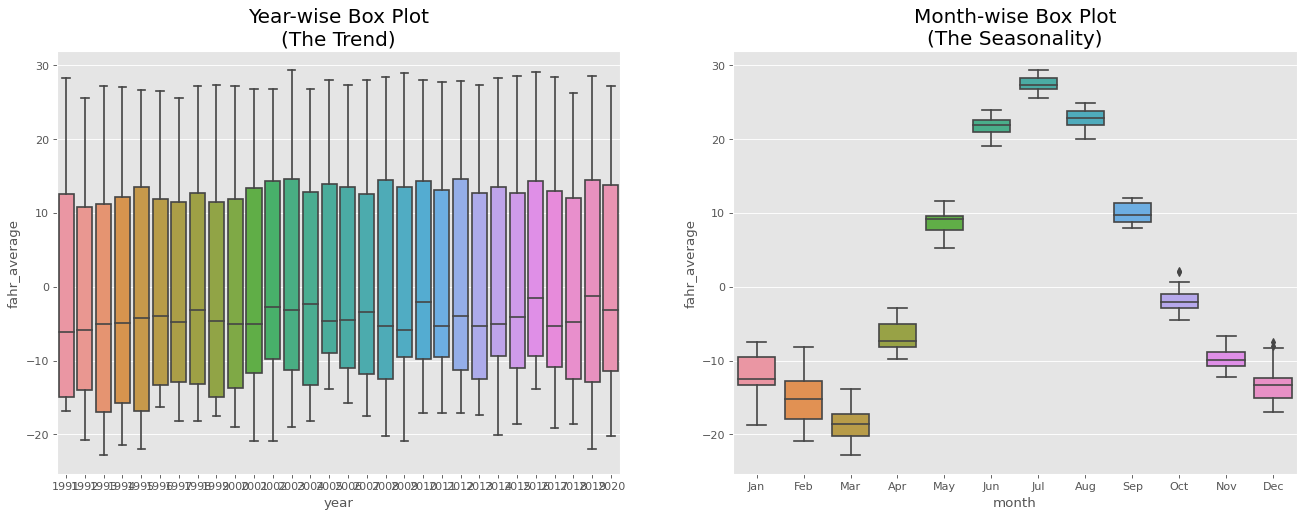

In [ ]:
# preparing data for boxplot
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# create Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='fahr_average', data=df, ax=axes[0])
sns.boxplot(x='month', y='fahr_average', data=df.loc[~df.year.isin([1991, 2020]), :])

# title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

After viewing the figures above, we noticed that the variance between average temperatures appeared greater in the meteorological winter months than the rest of the year, so we wanted to group by month and focus on the variance for our model.

# Model

In [ ]:
# making a new dataframe from our original climate dataframe for variance grouped by month
month_var = climate.groupby("month").var()
month_var['variance'] = month_var['fahr_average']
month_var.drop(columns=['fahr_average'], inplace=True)
month_var

,celsius_average,year,variance
month,,,
Apr,1.310816,77.5,4.247044
Aug,0.449437,77.5,1.456175
Dec,2.278437,77.5,7.382135
Feb,2.708517,77.5,8.775596
Jan,2.363402,77.5,7.657423
Jul,0.296103,77.5,0.959375
Jun,0.454299,77.5,1.471928
Mar,1.535402,77.5,4.974703
May,0.799540,77.5,2.590510


In [ ]:
# we needed to add month as a variable and not just an index
# we also needed to identify which meteorological season each month belonged to
month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']
month_var['month'] = month
season = ['spring', 'summer', 'winter', 'winter', 'winter', 'summer', 'summer', 'spring', 'spring', 'fall', 'fall', 'fall']
month_var['season'] = season
month_var

,celsius_average,year,variance,month,season
month,,,,,
Apr,1.310816,77.5,4.247044,Apr,spring
Aug,0.449437,77.5,1.456175,Aug,summer
Dec,2.278437,77.5,7.382135,Dec,winter
Feb,2.708517,77.5,8.775596,Feb,winter
Jan,2.363402,77.5,7.657423,Jan,winter
Jul,0.296103,77.5,0.959375,Jul,summer
Jun,0.454299,77.5,1.471928,Jun,summer
Mar,1.535402,77.5,4.974703,Mar,spring
May,0.799540,77.5,2.590510,May,spring


Text(0.5, 0.98, 'Seasonal Variance')

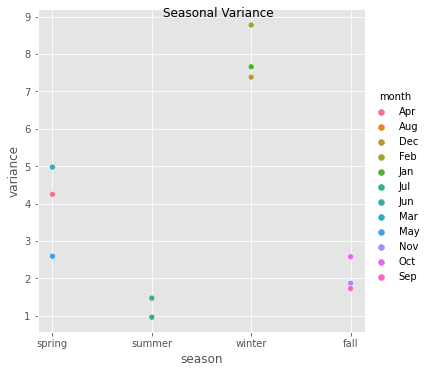

In [ ]:
# scatter plot of seasonal variance
g = sns.relplot(data=month_var, x='season', y='variance', hue='month')
g.fig.suptitle("Seasonal Variance")

In [ ]:
# using statsmodels to fit the regression model
import statsmodels.formula.api as smf
res = smf.ols(formula='variance ~ C(season)', data=month_var).fit() #season instead of month
# inspecting the results
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               variance   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     45.43
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           2.27e-05
Time:                        23:13:27   Log-Likelihood:                -11.351
No. Observations:                  12   AIC:                             30.70
Df Residuals:                       8   BIC:                             32.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.0560      0.441      4.666      0.002       1.040       3.072
C(season)[T.spring]     1.8814      0.623      3.019      0.017       0.444       3.318
C(season)[T.summer]    -0.7602      0.623     -1.220      0.257      -2.197       0.677
C(season)[T.winter]     5.8824      0.623      9.440      0.000       4.445       7.319
==============================================================================
Omnibus:                        0.663   Durbin-Watson:                   2.786
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.178
Skew:                          -0.288   Prob(JB):                        0.915
Kurtosis:                       2.847   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# using anova.lm to compute an analysis of the variance table
from statsmodels.stats.api import anova_lm
table = anova_lm(res)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,79.372063,26.457354,45.425357,0.000023
Residual,8.0,4.659486,0.582436,NaN,NaN


In [ ]:
# checking our results for linearity, which fail the test. this is likely because we have repeated measures in our seasons variable
from statsmodels.compat import lzip
import statsmodels.stats.api as sma
name = ["t value", "p value"]
test = sma.linear_harvey_collier(res)
lzip(name, test)

[('t value', -2.8520959959025936), ('p value', 0.021409952155362868)]

This next part will be a bit tedious as I am going to perform the same EDA on all 12 months within their respective meteorological season to get an idea of each season's average temperature activity over the 30-year timeframe. The correlation coefficient will be found for each month vs year.

This section, like the seasonal analysis we performed, would be much more concisely analysed through a time series analysis so future research will proceed with that analysis.

# Winter

In [ ]:
# creating dataframes for the meteorological winter months through the 30-year timeframe

# december dataframe
dec = climate['month'] == 'Dec'
climate_dec = climate[dec]

# january dataframe
jan = climate['month'] == 'Jan'
climate_jan = climate[jan]

# february dataframe
feb = climate['month'] == 'Feb'
climate_feb = climate[feb]

December correlation coefficient for the 30-year timeframe:
0.401182655705405


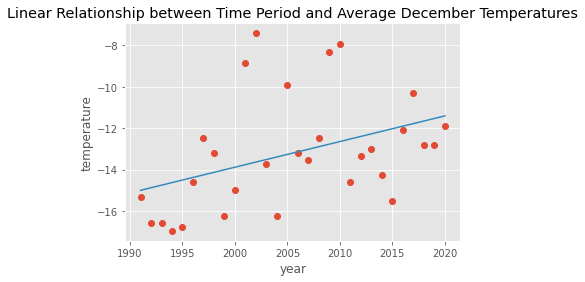

In [ ]:
# scatterplot with linear regression line for relationship between time period progression of december vs temperature

# december
x = climate_dec['year']
y = climate_dec['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average December Temperatures')

# december correlation
print("December correlation coefficient for the 30-year timeframe:")
print(climate_dec['year'].corr(climate_dec['fahr_average']))

January correlation coefficient for the 30-year timeframe:
0.6316243303452036


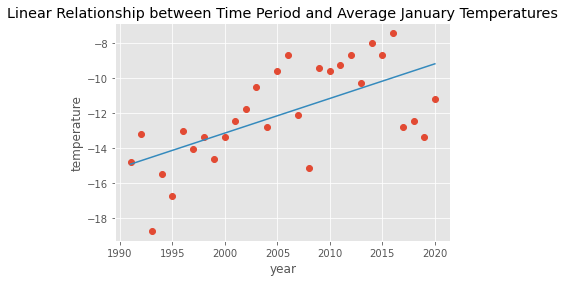

In [ ]:
# january
x = climate_jan['year']
y = climate_jan['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average January Temperatures')

# january correlation
print("January correlation coefficient for the 30-year timeframe:")
print(climate_jan['year'].corr(climate_jan['fahr_average']))

February correlation coefficient for the 30-year timeframe:
0.4106769351285586


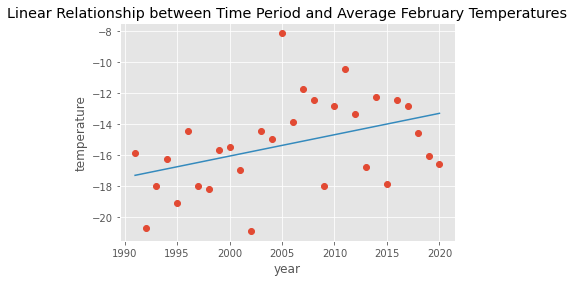

In [ ]:
# february
x = climate_feb['year']
y = climate_feb['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average February Temperatures')

# february correlation
print("February correlation coefficient for the 30-year timeframe:")
print(climate_feb['year'].corr(climate_feb['fahr_average']))

The correlation coefficient of 0.4118 is a moderate positive linear relationship between the year progression and the temperature in fahrenheit for the month of December.

The correlation coefficient of 0.6316 is a strong positive linear relationship between the year progression and the temperature in fahrenheit for the month of January.

The correlation coefficient of 0.4107 is a moderate positive linear relationship between the year progression and the temperature in fahrenheit for the month of February.

# Spring

In [ ]:
# creating dataframes for the meteorological spring months through the 30-year timeframe

# march dataframe
mar = climate['month'] == 'Mar'
climate_mar = climate[mar]

# april dataframe
apr = climate['month'] == 'Apr'
climate_apr = climate[apr]

# may dataframe
may = climate['month'] == 'May'
climate_may = climate[may]

March correlation coefficient for the 30-year timeframe:
0.13403120255499892


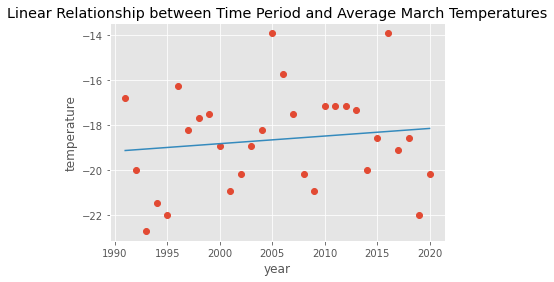

In [ ]:
# march
x = climate_mar['year']
y = climate_mar['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average March Temperatures')

# march correlation
print("March correlation coefficient for the 30-year timeframe:")
print(climate_mar['year'].corr(climate_mar['fahr_average']))

April correlation coefficient for the 30-year timeframe:
0.10657082301284859


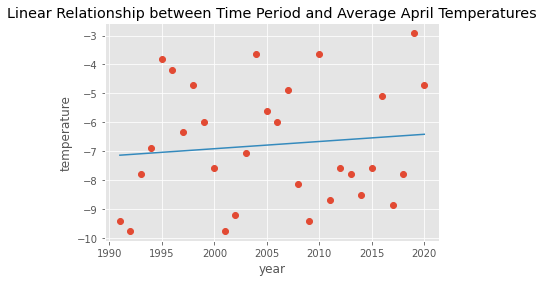

In [ ]:
# april
x = climate_apr['year']
y = climate_apr['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average April Temperatures')

# april correlation
print("April correlation coefficient for the 30-year timeframe:")
print(climate_apr['year'].corr(climate_apr['fahr_average']))

May correlation coefficient for the 30-year timeframe:
0.3272288546878019


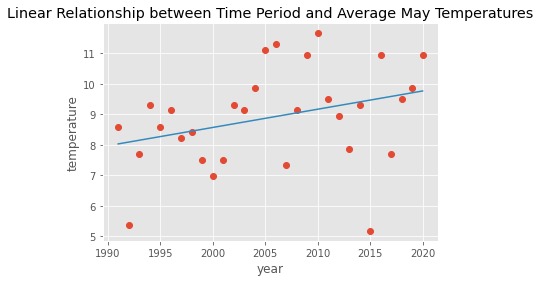

In [ ]:
# may
x = climate_may['year']
y = climate_may['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average May Temperatures')

# may correlation
print("May correlation coefficient for the 30-year timeframe:")
print(climate_may['year'].corr(climate_may['fahr_average']))

The correlation coefficient of 0.1340 is a very weak positive relationship between the year progression and the temperature in fahrenheit for the month of March.

The correlation coefficient of 0.1066 is a very weak positive relationship between the year progression and the temperature in fahrenheit for the month of April. This is the smallest magnitude of all of the months throughout the 30-year timeframe.

The correlation coefficient of 0.3272 is a weak positive linear relationship between the year progression and the temperature in fahrenheit for the month of May.

# Summer

In [ ]:
# creating dataframes for the meteorological summer months through the 30-year timeframe

# june dataframe
jun = climate['month'] == 'Jun'
climate_jun = climate[jun]

# july dataframe
jul = climate['month'] == 'Jul'
climate_jul = climate[jul]

# august dataframe
aug = climate['month'] == 'Aug'
climate_aug = climate[aug]

June correlation coefficient for the 30-year timeframe:
0.43876025829317056


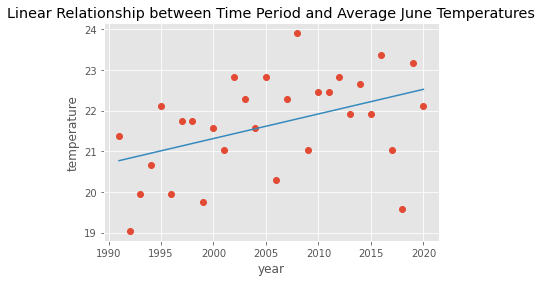

In [ ]:
# june
x = climate_jun['year']
y = climate_jun['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average June Temperatures')

# june correlation
print("June correlation coefficient for the 30-year timeframe:")
print(climate_jun['year'].corr(climate_jun['fahr_average']))

July correlation coefficient for the 30-year timeframe:
0.4848049198070419


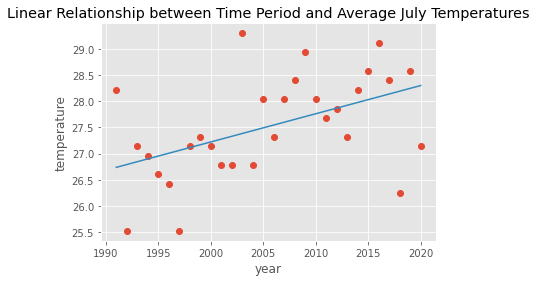

In [ ]:
# jul
x = climate_jul['year']
y = climate_jul['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average July Temperatures')

# july correlation
print("July correlation coefficient for the 30-year timeframe:")
print(climate_jul['year'].corr(climate_jul['fahr_average']))

August correlation coefficient for the 30-year timeframe:
0.5535999771620395


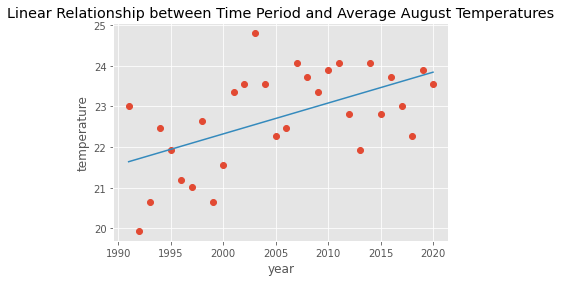

In [ ]:
# aug
x = climate_aug['year']
y = climate_aug['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average August Temperatures')

# august correlation
print("August correlation coefficient for the 30-year timeframe:")
print(climate_aug['year'].corr(climate_aug['fahr_average']))

The correlation coefficient of 0.4388 is a weak/moderate positive linear relationship between the year progression and the temperature in fahrenheit for the month of June.

The correlation coefficient of 0.4848 is a moderate positive linear relationship between the year progression and the temperature in fahrenheit for the month of July.

The correlation coefficient of 0.5536 is a moderate positive linear relationship between the year progression and the temperature in fahrenheit for the month of August.

# Fall

In [ ]:
# creating dataframes for the meteorological winter months through the 30-year timeframe

# september dataframe
sep = climate['month'] == 'Sep'
climate_sep = climate[sep]

# october dataframe
oct = climate['month'] == 'Oct'
climate_oct = climate[oct]

# november dataframe
nov = climate['month'] == 'Nov'
climate_nov = climate[nov]

September correlation coefficient for the 30-year timeframe:
0.25814225278491365


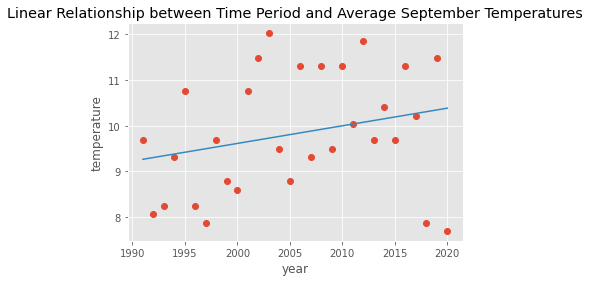

In [ ]:
# september
x = climate_sep['year']
y = climate_sep['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average September Temperatures')

# september correlation
print("September correlation coefficient for the 30-year timeframe:")
print(climate_sep['year'].corr(climate_sep['fahr_average']))

October correlation coefficient for the 30-year timeframe:
0.4136548774855899


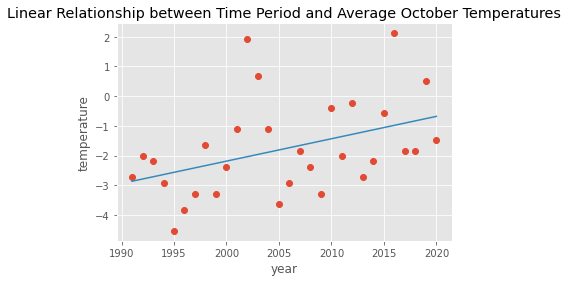

In [ ]:
# october
x = climate_oct['year']
y = climate_oct['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average October Temperatures')

# october correlation
print("October correlation coefficient for the 30-year timeframe:")
print(climate_oct['year'].corr(climate_oct['fahr_average']))

FNovember correlation coefficient for the 30-year timeframe:
0.2680722184981294


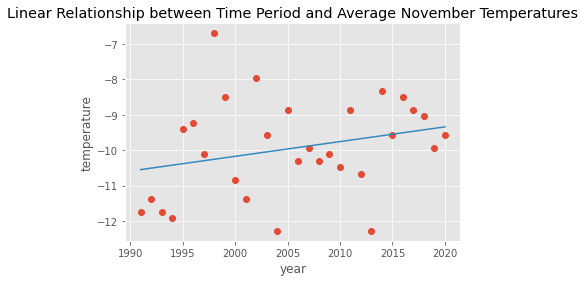

In [ ]:
# november
x = climate_nov['year']
y = climate_nov['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Linear Relationship between Time Period and Average November Temperatures')

# november correlation
print("FNovember correlation coefficient for the 30-year timeframe:")
print(climate_nov['year'].corr(climate_nov['fahr_average']))

The correlation coefficient of 0.2581 is a weak positive linear relationship between the year progression and the temperature in fahrenheit for the month of September.

The correlation coefficient of 0.4137 is a weak/moderate positive linear relationship between the year progression and the temperature in fahrenheit for the month of October.

The correlation coefficient of 0.2681 is a weak positive linear relationship between the year progression and the temperature in fahrenheit for the month of November

# Visual Illustrations

This first visualization is the reason we used the model that we did in approaching how to answer our research question and it is also the visualization that best sums up our findings from our model. We noticed that during the general middle months of the year, there appeared to be a minimal variance when compared to months near the beginning and end of the year. This is when we decided to focus on variance by month over the course of our 30-year timeline. These outer months are the most visually apparent months over the 30 years where there is a greater variance than we would expect for a time period in which there was not a significant change in temperature. This variance was our first indication that our null hypothesis, that there has been no temperature change over the last 30 years, could possibly be rejected and needed to be examined further.

While this visual is fairly straight-forward, readability is impaired by the amount of years that are displayed on the same graph. This is great for visually comparing variance across months but not great if we are attempting to use this graph to follow a specific year or make inferences about whether a possible change in temperature over the timeline could be an increase or a decrease.

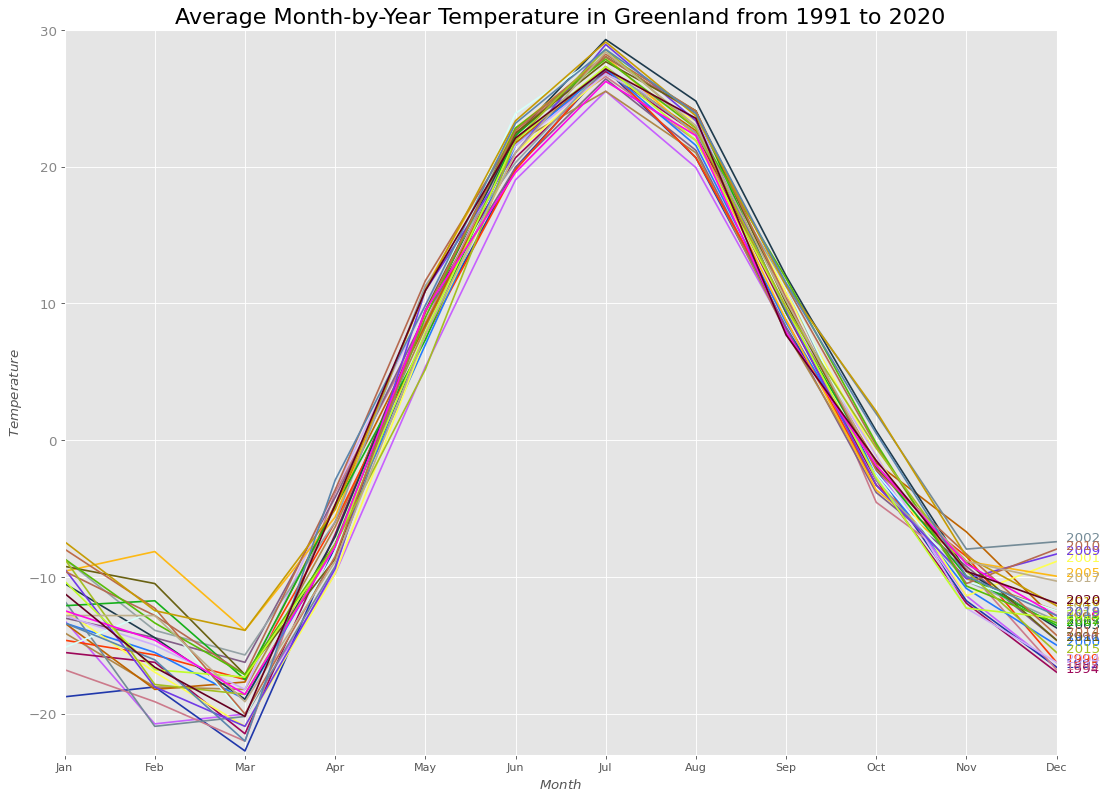

In [ ]:
# Visualization of the average monthly temperature in Greenland from 1991-2020 with all 30 years on the same figure
df = pd.read_csv('/gdrive/MyDrive/DATA0200/climate_time', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

#prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# prep colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# draw plot
plt.figure(figsize=(16,12), dpi=80)
for i, y in enumerate(years): 
  if i>0: 
    plt.plot('month', 'fahr_average', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'fahr_average'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# decor
plt.gca().set(xlim=(0, 11), ylim=(-23, 30), ylabel='$Temperature$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Average Month-by-Year Temperature in Greenland from 1991 to 2020", fontsize=20)
plt.show()

The following four visualizations are of each season and each graph contains the data and regression lines for the three meteorological months belonging to each season. These illustrations are not so much as to show variance in our data's seasons but to show the magnitude and direction of temperature changes for each month and season over our 30-year time period. 

While our model did show that variance was significantly dependent on season which could suggest a significant change in temperature over time, these illustrations show that for every month, that change in temperature is positive. We still need to run more tests that are better suited for our data.

Correlation coefficients and a closer look at each month's individual graph can be found under each season's tab.

Text(0.5, 1.0, 'Winter Months Regression')

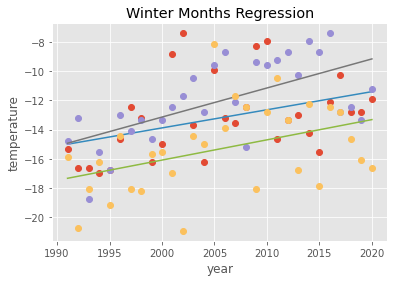

In [ ]:
# december
x = climate_dec['year']
y = climate_dec['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)


# january
x = climate_jan['year']
y = climate_jan['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)


# february
x = climate_feb['year']
y = climate_feb['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Winter Months Regression')

Text(0.5, 1.0, 'Spring Months Regression')

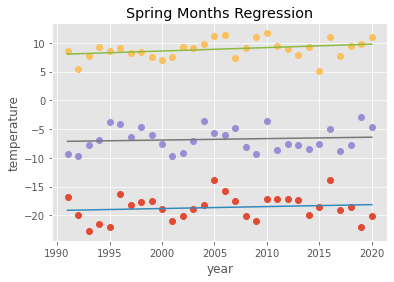

In [ ]:
# march
x = climate_mar['year']
y = climate_mar['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)


# april
x = climate_apr['year']
y = climate_apr['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)


# may
x = climate_may['year']
y = climate_may['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Spring Months Regression')

Text(0.5, 1.0, 'Summer Months Regression')

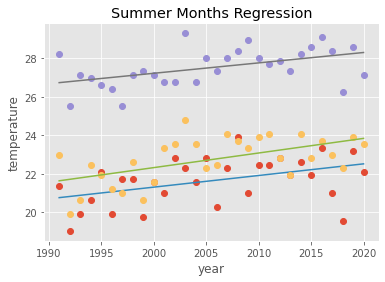

In [ ]:
# june
x = climate_jun['year']
y = climate_jun['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)


# jul
x = climate_jul['year']
y = climate_jul['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)


# aug
x = climate_aug['year']
y = climate_aug['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Summer Months Regression')

Text(0.5, 1.0, 'Fall Months Regression')

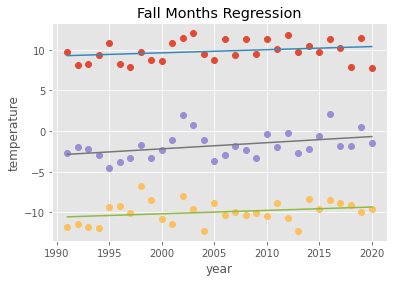

In [ ]:
# september
x = climate_sep['year']
y = climate_sep['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)


# october
x = climate_oct['year']
y = climate_oct['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)


# november
x = climate_nov['year']
y = climate_nov['fahr_average']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Fall Months Regression')